In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Linear Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     921.4
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.22e-51
Time:                        17:21:37   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5581      0.054     47.751      0.0

Text(0.5, 1.0, 'Linear Regression - OLS')

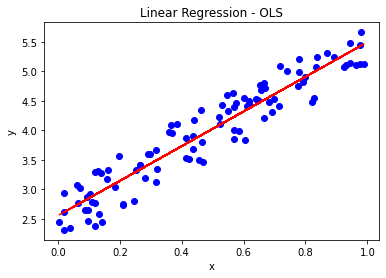

In [6]:
## Linear Regression
np.random.seed(0)
x = np.random.rand(100,1)
y = 2 + 3*x + np.random.rand(100,1)

x_with_const = sm.add_constant(x)
OLS = sm.OLS(y,x_with_const)
OLS_mdl = OLS.fit()

print(OLS_mdl.summary())

OLS_pred = OLS_mdl.predict(x_with_const)

plt.scatter(x,y,color='blue')
plt.plot(x,OLS_pred,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression - OLS')

### Poisson Regression

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -282.99
Date:                Fri, 15 Oct 2021   Deviance:                       20.824
Time:                        19:42:55   Pearson chi2:                     21.5
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3662      0.041     58.153      0.0

Text(0, 0.5, 'y')

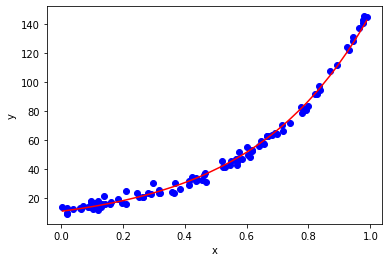

In [61]:
## Poisson Regression
np.random.seed(0)
lamda = 5

x = np.random.rand(100,1)
y = np.exp(2 + 3*x) + np.random.poisson(lamda,100).reshape(-1,1) 

x_with_const = sm.add_constant(x)

# Poisson regression
mdl = sm.GLM(y, x_with_const, family=sm.families.Poisson(link=sm.families.links.log()))
mdl_fit = mdl.fit()
print(mdl_fit.summary())

y_pred = mdl_fit.predict(x_with_const)

idx = x.reshape(1,-1)[0].argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.scatter(x, y, color='blue')
plt.plot(x_ord, y_pred_ord,color='red')
plt.xlabel("x")
plt.ylabel("y")

### Logistic Regression

Text(0, 0.5, 'sigmoid')

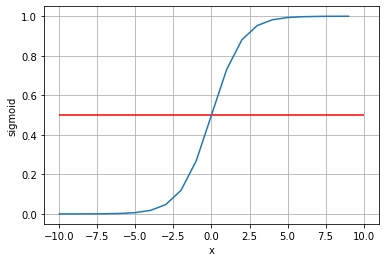

In [100]:
def sigmoid(x_val):
    sigmoid = (1/(1+np.exp(-x_val)))
    return(sigmoid)

x_val = np.arange(-10,10)
y_val = sigmoid(x_val)

plt.plot(x_val,y_val)
plt.hlines(y=0.5,xmin=-10,xmax=10,color='red')
plt.grid()
plt.xlabel("x")
plt.ylabel("sigmoid")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.1813
Date:                Sat, 16 Oct 2021   Deviance:                       18.363
Time:                        08:37:38   Pearson chi2:                     30.4
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6985
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6438      0.829      1.984      0.0

Text(0, 0.5, 'y')

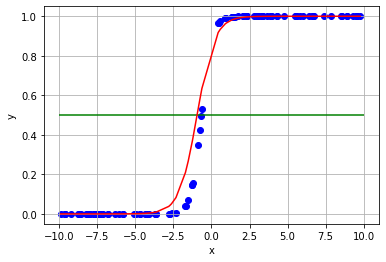

In [121]:
## Logistic Regression
np.random.seed(0)

x = np.random.uniform(-10,10,100)
y = sigmoid(2 + 3*x)

y_class = np.random.binomial(n=1,p=y)

x_with_const = sm.add_constant(x)

mdl = sm.GLM(y_class, x_with_const, family=sm.families.Binomial(link=sm.families.links.logit()))
mdl_fit = mdl.fit()
print(mdl_fit.summary())

y_pred = mdl_fit.predict(x_with_const)

idx = x.reshape(1,-1)[0].argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.scatter(x, y, color='blue')
plt.plot(x_ord, y_pred_ord,color='red')
plt.hlines(y=0.5,xmin=-10,xmax=10,color='g')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")

### Softmax Regression

log likelihood

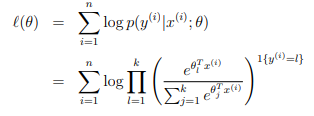

In [275]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X,y = make_classification(n_samples=1000, n_features=5, n_informative=4, n_redundant=0, n_classes=4)

# Test-Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient descent Algo
theta = np.random.rand(5,1)
n_iter = 10000
alpha = 0.01
tol = 1e-6

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=0)).T
    return sm

def cal_Prob_Pred(X,theta):
    prob = softmax(np.dot(X,theta))
    pred = np.argmax(prob,axis=1)
    return prob,pred

def loglikelihood(x, y, theta):
    for j in set(y):
        idy = np.where(y == j)
        x_train_class = x[idy]
        prob,pred = cal_Prob_Pred(x_train_class,theta)
        J += np.sum(np.log(prob))
    return J

def gradient_des(x,y,theta,alpha,n_iter,tol):
    cost_func_hist = np.zeros((n_iter))
    theta_hist = np.zeros((n_iter,5))
    
    for iter in range(n_iter):
        H_theta = softmax(np.dot(x,theta))
        gradient = np.dot(x.T,(H_theta-y))
        update = (alpha/len(x))*gradient
        
        if np.all(np.abs(update) <= tol):
            print('Reached tolerance value')
            break
            
        theta = theta - update
        cost_func_hist[iter] = np.sum(np.log(H_theta))
        theta_hist[iter] = theta.reshape(1,5)
        
    return(theta,theta_hist,cost_func_hist)

theta_GD,theta_hist,cost_func_hist = gradient_des(X_train,y_train.reshape(-1,1),theta,alpha,n_iter,tol)

Text(0, 0.5, 'Cost Function')

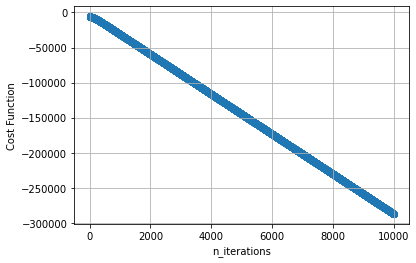

In [276]:
plt.scatter(list(np.arange(n_iter)),cost_func_hist)
plt.grid()
plt.xlabel('n_iterations')
plt.ylabel('Cost Function')